# Data Visualization and storytelling

### *Sonal Joshi*

##### [Dataset](https://www.kaggle.com/datasets/usdot/flight-delays?resource=download)


In [7]:
# Importing the packages
import pandas as pd
import numpy as np

In [8]:
# To display all the columns whenever .head() is used which can be used to pre-process data.
pd.options.display.max_columns = None

> Loading the all the files different variables and converting it into a pandas dataframe using pandas library.

In [9]:
# Files path
path = "/content/drive/MyDrive/Colab Notebooks/data/"

# Loading all files
data = pd.read_csv(path + 'flights.csv')
airlines = pd.read_csv(path + 'airlines.csv')
airport = pd.read_csv(path + 'airports.csv')

<ipython-input-9-386a7061cb20>:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path + 'flights.csv')


> Pre-processing the data and merging them into one dataframe using left join.

In [10]:
# Merging the dataframes data and airlines using join on columns
df = pd.merge(data,airlines, left_on='AIRLINE', right_on = 'IATA_CODE')

# Inserting a new column called 'AIRLINE' at index position 5 in df, with the values from the AIRLINE_y column of df
df.insert(loc=5, column='AIRLINE', value=df.AIRLINE_y)
# Dropping columns
df = df.drop(['AIRLINE_y','IATA_CODE'], axis=1)

# Following the same procedure for the airport data set that contains airport & city info.
# Merging the dataframes data and airlines using join on columns and dropping the unnecessary columns
df = pd.merge(df,airport[['IATA_CODE','AIRPORT','CITY']], left_on='ORIGIN_AIRPORT', right_on = 'IATA_CODE')
df = df.drop(['IATA_CODE'], axis=1)

# Merge is based on the DESTINATION_AIRPORT column and dropping the unnecessary columns
df = pd.merge(df,airport[['IATA_CODE','AIRPORT','CITY']], left_on='DESTINATION_AIRPORT', right_on = 'IATA_CODE')
df = df.drop(['IATA_CODE'], axis=1)

## Data Exploration and visualization

### Use different visualizations to summarize the data (data exploration).

> Plotly is a powerful data visualization library that allows users to create interactive, high-quality visualizations. We will be using plotly for most of our visualizations.

In [11]:
# Importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

#### Origin Airport Pie Chart Distribution
> First, we will see the percentage distribution of the top 10 origin airports in the dataset, with each airport represented by a slice of the pie. The size of each slice corresponds to the percentage of flights that originated from that airport. By using a pie chart, it is easy to compare the relative frequencies of the different airports and identify which airports are the most common origin points for flights in the dataset.


In [12]:
# Creates a new dataframe dff by performing a value count on the AIRPORT_y column of df and selecting the top 10 values.
dff = df['AIRPORT_y'].value_counts()[:10]

# Extracts the index values and the count values of dff.
label = dff.index
size = dff.values

# Creates a Pie object, passing in the label and size variables as arguments.
trace = go.Pie(labels=label, values=size,hole = .2)

# Converting the object to list
data = [trace]

# Sets the title of the chart
layout = go.Layout(
    title='Origin Airport Pie Chart Distribution'
)

# Creates a figure object
fig = go.Figure(data=data, layout=layout)

# Plots the piechart
py.iplot(fig)

> The pie chart shows which airports (Origin) are busy and most commonly used for flying.

#### Air Traffic Volume Heatmap for the every day of the week.
>  The  heatmap displays the air traffic volume for the top 7 cities in the dataset for each day of the week. The color of each cell in the heatmap indicates the relative volume of flights for that city and day of the week, with red indicating high volume and blue indicating low volume. 
>
>  By using a heatmap, it is easy to identify patterns and trends in the data, such as which days of the week have the highest volume of flights for each city.

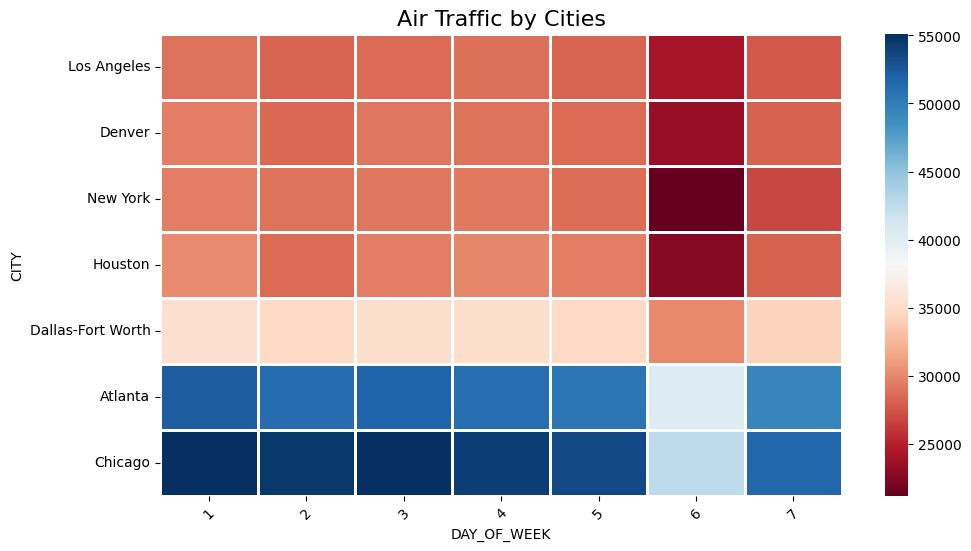

In [13]:
# Creates a pivot table by aggregating the number of flights for each city and each day of the week
flight_volume = df.pivot_table(index="CITY_x",columns="DAY_OF_WEEK",
                               values="DAY",aggfunc=lambda x:x.count())

# Selects the top 7 cities with the highest number of flights on Monday (1st day of the week) and sorts them in ascending order
fv = flight_volume.sort_values(by=1, ascending=False)[:7]
fv = fv.iloc[::-1]

# Creates a matplotlib figure object
fig = plt.figure(figsize=(11,6))
sns.heatmap(fv, cmap='RdBu',linecolor="w", linewidths=2)

# Sets the axis labels and title
plt.title('Air Traffic by Cities',size=16)
plt.ylabel('CITY')

#Rotates the x-tick labels by 45 degree
plt.xticks(rotation=45)

# Displays the heatmap
plt.show()

#### Number of flights - monthly

> The bar chart shows the number of flights for each month, with each bar representing a month and its height indicating the number of flights. The color of each bar is darker or lighter based on the number of flights. This chart helps to visualize which months have the highest number of flights and which months have the lowest number of flights.

In [14]:
# Creates a new dataframe by performing a value count on the 'MONTH' column of df, which counts the 
# number of flights for each month. The reset_index() function is used to convert the index values to a column, 
# and sort the values by the month in ascending order.
dff = df.MONTH.value_counts().to_frame().reset_index().sort_values(by='index')
dff.columns = ['month', 'flight_num']

# Creates a dictionary month that maps the integer values of the month to their respective names.
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Maps the month values in the dff dataframe to their respective names with the month dictionary.
dff.month = dff.month.map(month)

# Creates a Bar object with the x-axis values set to the month names, and the y-axis values set to the # of flights for each month.
# The marker dictionary is used to set the color of the bars to the number of flights. 
# The showscale option shows the color scale next to the chart.
trace = go.Bar(
    x=dff.month,
    y=dff.flight_num,
    marker=dict(
        color = dff.flight_num,
        colorscale='Blues',
        showscale=True)
)

# Converts traxe the object to list
data = [trace]

# Setting the title and y-axis label
layout = go.Layout(
    title='No of Flights (monthly)', 
    yaxis = dict(title = '# of Flights'
                                                )
)
# Creates a Figure object with data and layout and then plots the bar chart
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Find an interesting question/problem from your data. Use a combination of text and graphics to pose the problem

**What are the most common reasons for flight cancellations by day of week, and which airlines and cities have the highest mean delay times and cancellation rates?**

This can help airlines and airports identify patterns in cancellations and delays by day of the week, and the most common reasons for cancellations. By understanding these patterns, airlines and airports can potentially improve their operations to reduce cancellations and improve on-time performance, which can lead to higher customer satisfaction. Additionally, by analyzing mean delay times and cancellation rates by airline and city, airlines and airports can identify areas for improvement and potentially increase customer satisfaction.

##### Mean Delay by Airlines (Minutes)

In [15]:
# Column 'DEP_ARR_DIFF' is added to the original dataframe which is the difference between 'DEPARTURE_DELAY' and 'ARRIVAL_DELAY' columns.
df['DEP_ARR_DIFF'] = df['DEPARTURE_DELAY'] - df['ARRIVAL_DELAY']

# Groups by airlines and calculates the mean of 'DEP_ARR_DIFF' for each airline and rounds to 2 decimal places. 
# Dataframe is then sorted in descending order
dff = df.groupby('AIRLINE').DEP_ARR_DIFF.mean().to_frame().sort_values(by='DEP_ARR_DIFF',
                                                    ascending=False).round(2)

# Creates a bar chart object. 
# The x-axis represents the airlines and the y-axis represents the mean (departure - arrival) delay for each airline
# The showscale option shows the color scale next to the chart
trace = go.Bar(
    x=dff.index,
    y=dff.DEP_ARR_DIFF,
    marker=dict(
        color = dff.DEP_ARR_DIFF,
        colorscale='Blues',
        showscale=True
    ) 
  )
# Converts the trace object to list
data = [trace]

# Sets the layout and title
layout = go.Layout(xaxis=dict(tickangle=15),
    title='Mean (Departure Delay - Arrival Delay) by Airlines', 
                   yaxis = dict(title = 'minute')
                  )

# Creates a figure object and plots it
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

##### Cancellation Rate by Airlines

In [16]:
# Groups data by airline and selects the 'CANCELLED' column, then calculates 
# the mean cancellation rate for each airline and rounds it to 3 decimal numbers
dff = df.groupby('AIRLINE')[['CANCELLED']].mean().sort_values(by='CANCELLED', ascending=False).round(3)

# Creates a scatter plot with parameters for x- & y-axis and markers
trace1 = go.Scatter(
    x=dff.index,
    y=dff.CANCELLED,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.CANCELLED,
        colorscale='Portland',
        showscale=True
    )
  )

# Converts the trace1 object to list
data = [trace1]

# Sets the layout and title
layout = go.Layout(
    xaxis=dict(tickangle=20),
    title='Cancellation Rate by Airlines', yaxis = dict(title = 'Cancellation Rate')
    )

# Creates a figure object and plots it
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age")


> The scatterplot allows us to easily compare the cancellation rates of different airlines and identify which ones have the highest and lowest cancellation rates. We can see that the airline with the highest cancellation rate is American Eagle (MQ) Airlines and the one with the lowest is Hawaiian Airlines Inc. (HA). 
> It is also easy to see that there is a large variation in cancellation rates between different airlines, with some having rates close to 0% while others have rates close to 4%.

> This information can be useful for travelers who want to choose an airline with a lower likelihood of cancellations. It can also be useful for airlines themselves, as they can use this information to improve their operations and reduce their cancellation rates.


##### Cancellation Reason by Cities

In [17]:
# Groups data by cities and selects the 'CANCELLED' column, then calculates 
# the mean cancellation rate for each city and rounds it to 3 decimal numbers
dff = df.groupby('CITY_x')[['CANCELLED']].mean().sort_values(by='CANCELLED', ascending=False)[:10].round(3)

# Creates a scatter plot with parameters for x-axis, y-axis and markers. 
trace2 = go.Scatter(
    x=dff.index,
    y=dff.CANCELLED,
    mode='markers',
    marker=dict(symbol = 'diamond',
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.CANCELLED,
        colorscale='Portland',
        showscale=True
    )
  )

# Converts the trace2 object to list
data = [trace2]

# Sets the layout and title 
layout = go.Layout(xaxis=dict(tickangle=20),
    title='Cancellation Rate by Cities', 
                   yaxis = dict(title = 'Cancellation Rate')
  )

# Creates a figure object and plots it
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

> The scatter plot shows the top 10 cities with the highest cancellation rates for flights. From the plot, we can see that Lubbock, TX has the highest cancellation rate followed by Roswell, NM and Midland/Odessa, TX. It is interesting to note that all cities in the top 10 are from the southern region of the United States. The plot shows that there is a significant variation in the cancellation rates among cities. The plot can help airlines identify the cities with the highest cancellation rates and take appropriate measures to reduce them.

##### Cancellation Reasons by Day of Week

In [18]:
# Creates a dictionary with keys representing the different reasons for flight cancellation.
reason={'A':'Airline/Carrier', 'B':'Weather', 'C':'National Air System', 'D':'Security'}

# Maps the values in the 'CANCELLATION_REASON' column of the df to the corresponding reason.
df.CANCELLATION_REASON = df.CANCELLATION_REASON.map(reason)

# Creates a subset of the df and sorts counts of the MONTH column values by index and maps the values
dff = df[df.CANCELLED==1]['MONTH'].value_counts().reset_index().sort_values(by='index')
dff.columns = ['month', 'flight_num']
dff.month = dff.month.map(month)


# Creates a dictionary with keys representing days of the week to their names
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}

# Returns the value counts of the 'DAY_OF_WEEK' column, sorts the index, and maps the index values to their corresponding names in dayOfWeek.
dff = df.DAY_OF_WEEK.value_counts()
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(dayOfWeek)

In [19]:
# Filters the dataframe by selecting rows where the cancellation reason is "Weather"
# then counts the number of flights cancelled for each day of the week
dff = df[df.CANCELLATION_REASON == 'Weather'].DAY_OF_WEEK.value_counts()
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(dayOfWeek)

# Creates a bar chart object for the above cancellation reason
# The x-axis represents the # of flights and the y-axis represents the Day of week
trace1 = go.Bar(
    x=dff.index,
    y=dff.DAY_OF_WEEK,
    name = 'Weather',
    marker=dict(
        color = 'aqua'
    )
)

# Filters the dataframe by selecting rows where the cancellation reason is "Airline/Carrier"
# then counts the number of flights cancelled for each day of the week
dff = df[df.CANCELLATION_REASON=='Airline/Carrier'].DAY_OF_WEEK.value_counts()
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(dayOfWeek)

# Creates a bar chart object for the above cancellation reason
# The x-axis represents the # of flights and the y-axis represents the Day of week
trace2 = go.Bar(
    x=dff.index,
    y=dff.DAY_OF_WEEK,
    name='Airline/Carrier',
    marker=dict(
        color = 'red'
    )
)

# Filters the dataframe by selecting rows where the cancellation reason is "National Air System"
# then counts the number of flights cancelled for each day of the week
dff = df[df.CANCELLATION_REASON=='National Air System'].DAY_OF_WEEK.value_counts()
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(dayOfWeek)

# Creates a bar chart object for the above cancellation reason
# The x-axis represents the # of flights and the y-axis represents the Day of week
trace3 = go.Bar(
    x=dff.index,
    y=dff.DAY_OF_WEEK,
    name='National Air System',
    marker=dict(
        color = 'navy')
  )

# Converts the trace2 object to list
data = [trace1,trace2,trace3]

# Sets the layout and title 
layout = go.Layout(
    title='Cancellation Reasons (Day of Week)', 
    yaxis = dict(title = '# of Flights')
  )

# Creates a figure object and plots it
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

> From the chart, it can be seen that the most common reason for flight cancellations is due to weather, with Thursday having the highest number of cancelled flights. The next most common reason is airline/carrier issues, with Friday having the highest number of cancelled flights. National air system issues are the least common reason for cancellation, with Tuesday having the highest number of cancelled flights.